Found 12102 images belonging to 2 classes.
Found 2964 images belonging to 2 classes.
Epoch 1/50
378/378 [==============================] - 48s 122ms/step - loss: 0.8409 - accuracy: 0.5507 - val_loss: 0.6701 - val_accuracy: 0.6151
Epoch 2/50
378/378 [==============================] - 53s 140ms/step - loss: 0.7067 - accuracy: 0.5814 - val_loss: 0.6519 - val_accuracy: 0.6250
Epoch 3/50
378/378 [==============================] - 48s 127ms/step - loss: 0.6640 - accuracy: 0.6081 - val_loss: 0.8529 - val_accuracy: 0.6291
Epoch 4/50
378/378 [==============================] - 46s 123ms/step - loss: 0.6356 - accuracy: 0.6336 - val_loss: 0.5621 - val_accuracy: 0.7052
Epoch 5/50
378/378 [==============================] - 45s 119ms/step - loss: 0.6148 - accuracy: 0.6547 - val_loss: 0.5345 - val_accuracy: 0.7082
Epoch 6/50
378/378 [==============================] - 48s 128ms/step - loss: 0.5988 - accuracy: 0.6747 - val_loss: 0.5650 - val_accuracy: 0.6963
Epoch 7/50
378/378 [=========================

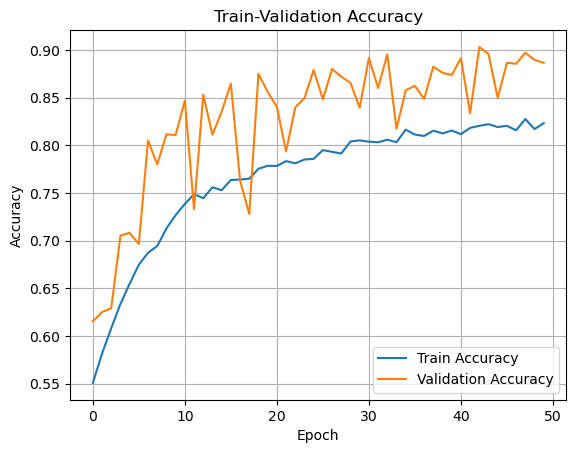

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop

# Veri setini yükleme ve ön işleme
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'train',
    target_size=(48, 48),
    batch_size=32,
    class_mode='binary',
    color_mode ='grayscale',
    classes=['happy', 'sad']
)

validation_generator = validation_datagen.flow_from_directory(
    'validation',
    target_size=(48, 48),
    batch_size=32,
    class_mode='binary',
    color_mode ='grayscale',
    classes=['happy', 'sad']
)

# CNN modeli oluşturma
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.3),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.3),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.3),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.3),
    
    Flatten(),
    
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer= RMSprop(learning_rate = 0.001),
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32
)

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train-Validation Accuracy')
plt.grid(True)
plt.show()
